<a href="https://colab.research.google.com/github/marciarzky/UAS_SLO/blob/main/UAS_Marcia_Rizky_Hamdala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install factor_analyzer

from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis

from factor_analyzer import FactorAnalyzer



import matplotlib.pyplot as plt

In [47]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
cd /content/drive/MyDrive/Colab Notebooks/UAS\

/content/drive/MyDrive/Colab Notebooks/UAS


In [49]:
df = pd.read_csv('data_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [51]:
features = ['radius_mean','texture_mean','perimeter_mean','area_mean']
x = df.loc[:,features].values
y = df.loc[:,['diagnosis']].values
x = StandardScaler().fit_transform(x)

In [52]:
standardized_df = pd.DataFrame(x,columns=['radius_mean','texture_mean','perimeter_mean','area_mean'])
standardized_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean
0,1.097064,-2.073335,1.269934,0.984375
1,1.829821,-0.353632,1.685955,1.908708
2,1.579888,0.456187,1.566503,1.558884
3,-0.768909,0.253732,-0.592687,-0.764464
4,1.750297,-1.151816,1.776573,1.826229


In [53]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

lda = LinearDiscriminantAnalysis(n_components=2)
componentPrincipal = lda.fit(x,y)

principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1','principal component 2'])
principalDf.head()

print('explained ratio (first two components): %s' % str(pca.explained_variance_ratio_))

explained ratio (first two components): [0.78244019 0.21285703]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [54]:
finalDf = pd.concat([principalDf, df[['diagnosis']]],axis=1)
finalDf.head(100)

,principal component 1,principal component 2,diagnosis
0,1.341581,-2.497527,M
1,2.937381,-1.142690,M
2,2.743025,-0.252757,M
3,-1.121809,0.559649,M
4,2.693854,-1.903027,M
...,...,...,...
95,3.091124,0.083346,M
96,-1.044404,-0.073089,B
97,-1.908462,0.659960,B
98,-1.574026,-1.136681,B


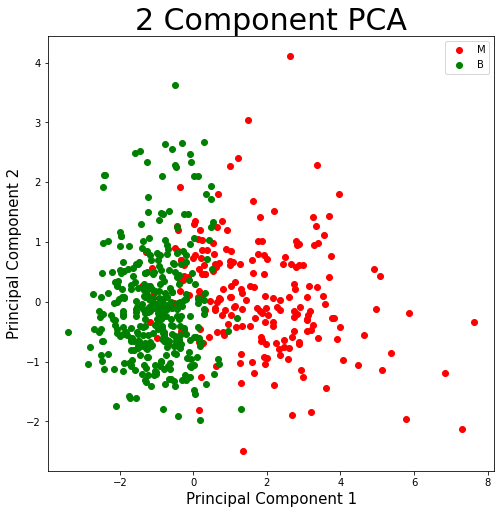

In [55]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize= 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 Component PCA', fontsize = 30)
targets = ['M','B']
colors = ['r','g']

for target, color in zip(targets,colors):
  indicesToKeep = finalDf['diagnosis'] == target
  ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
              finalDf.loc[indicesToKeep,'principal component 2'],
             c = color)
  
  ax.legend(targets)

In [56]:
fa = FactorAnalysis(n_components=2)
sdf = fa.fit_transform(principalComponents)
sdf[:5]

array([[ 0.62556336,  0.        ],
       [ 1.36966583,  0.        ],
       [ 1.27903972,  0.        ],
       [-0.5230861 ,  0.        ],
       [ 1.25611178,  0.        ]])